# CSE 583 project
Nixi Wang, Hongbin Qu, Luyu Xu, Shenghao Xie

# Example: A multi-level modeling of science performance and gender effect

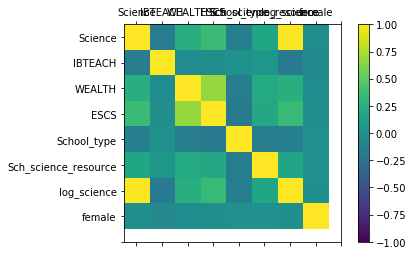

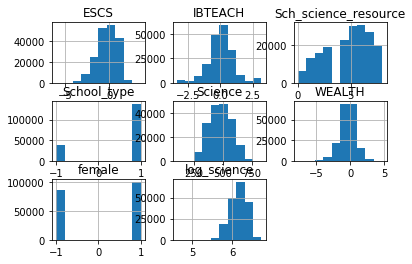

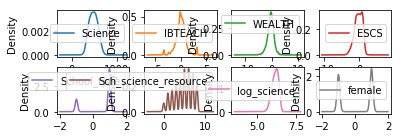

In [13]:
import correlation as corrvisual
corrvisual.main()

/home/rohit000/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Formula: Science ~ female + (female*ESCS | CountryID)

Family: gaussian	 Inference: parametric

Number of observations: 186394	 Groups: {'CountryID': 64.0}

Log-likelihood: -1077355.186 	 AIC: 2154736.372

Random effects:

                  Name       Var     Std
CountryID  (Intercept)  7094.814  84.231
CountryID       female    61.536   7.844
CountryID         ESCS  1174.692  34.274
CountryID  female:ESCS     0.355   0.596
Residual                6105.794  78.140

                   IV1          IV2   Corr
CountryID  (Intercept)       female -0.798
CountryID  (Intercept)         ESCS  0.883
CountryID  (Intercept)  female:ESCS  0.819
CountryID       female         ESCS -0.807
CountryID       female  female:ESCS -0.464
CountryID         ESCS  female:ESCS  0.738

Fixed effects:

Formula: Science ~ female + (female*ESCS | CountryID)

Family: gaussian	 Inference: parametric

Number of observations: 186394	 Groups: {'CountryID': 64.0}

Log-likelihood: -1077355.186 	 AIC: 2154736.372

Random

/home/rohit000/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Model failed to converge with max|grad| = 0.00297456 (tol = 0.002, component 1) 

Formula: log_science ~ IBTEACH + WEALTH + ESCS + female + Sch_science_resource + (1 | SchoolID/CountryID)

Family: gaussian	 Inference: parametric

Number of observations: 186394	 Groups: {'CountryID:SchoolID': 14419.0, 'SchoolID': 14419.0}

Log-likelihood: 79778.004 	 AIC: -159538.007

Random effects:

                           Name    Var    Std
CountryID:SchoolID  (Intercept)  0.007  0.081
SchoolID            (Intercept)  0.011  0.104
Residual                         0.021  0.144

No random effect correlations specified

Fixed effects:

Formula: log_science ~ IBTEACH + WEALTH + ESCS + female + Sch_science_resource + (1 | SchoolID/CountryID)

Family: gaussian	 Inference: parametric

Number of observations: 186394	 Groups: {'CountryID:SchoolID': 14419.0, 'SchoolID': 14419.0}

Log-likelihood: 79778.004 	 AIC: -159538.007

Random effects:

                           Name    Var    Std
CountryID:SchoolID  

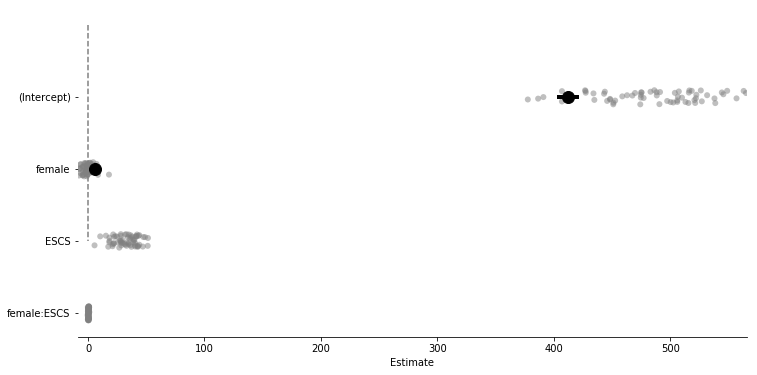

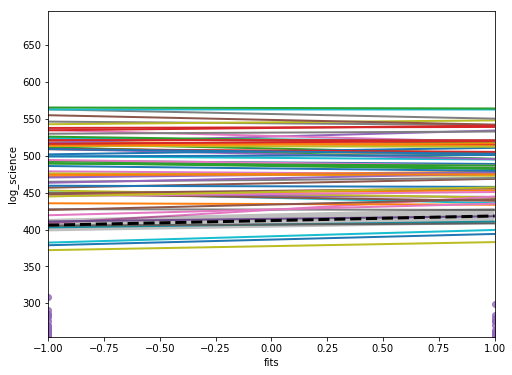

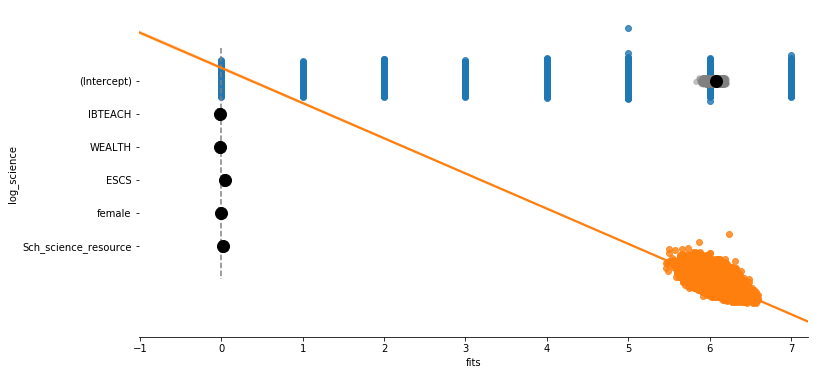

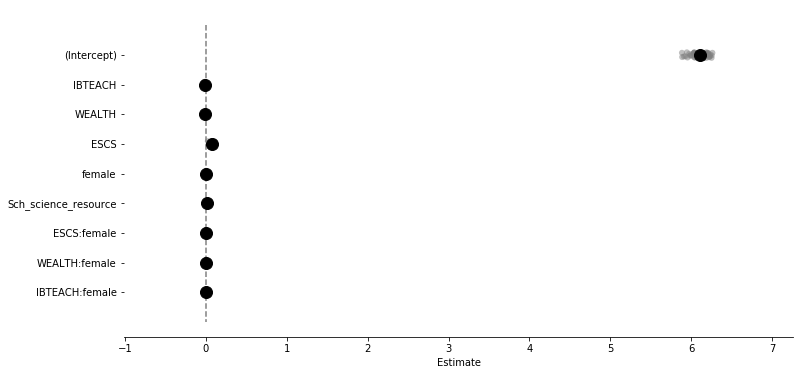

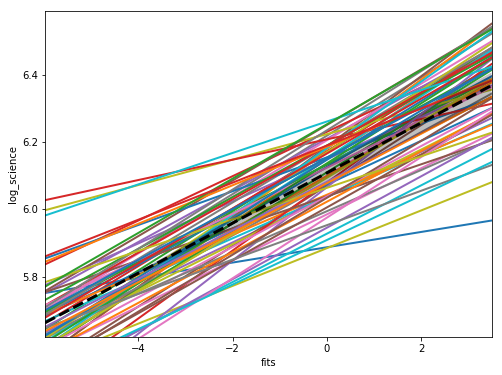

In [47]:
import importlib
import hlm_pymer4 as hpm
importlib.reload(hpm)
hpm.main()

Besides running the main function, users can also call a specific function and are able to specify a particular variable to see the visualization.

/home/rohit000/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: singular fit

  warnings.warn(x, RRuntimeWarning)
/home/rohit000/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


singular fit 

Formula: log_science ~ IBTEACH + WEALTH + ESCS + female + Sch_science_resource + female*ESCS + female*WEALTH + female*IBTEACH + (ESCS | CountryID)

Family: gaussian	 Inference: parametric

Number of observations: 273	 Groups: {'CountryID': 10.0}

Log-likelihood: 57.322 	 AIC: -88.644

Random effects:

                  Name    Var    Std
CountryID  (Intercept)  0.014  0.119
CountryID         ESCS  0.000  0.006
Residual                0.036  0.189

                   IV1   IV2  Corr
CountryID  (Intercept)  ESCS  -1.0

Fixed effects:

Formula: log_science ~ IBTEACH + WEALTH + ESCS + female + Sch_science_resource + female*ESCS + female*WEALTH + female*IBTEACH + (ESCS | CountryID)

Family: gaussian	 Inference: parametric

Number of observations: 273	 Groups: {'CountryID': 10.0}

Log-likelihood: 57.322 	 AIC: -88.644

Random effects:

                  Name    Var    Std
CountryID  (Intercept)  0.014  0.119
CountryID         ESCS  0.000  0.006
Residual                0.036  0

/home/rohit000/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: model_sum_visual() takes 2 positional arguments but 3 were given

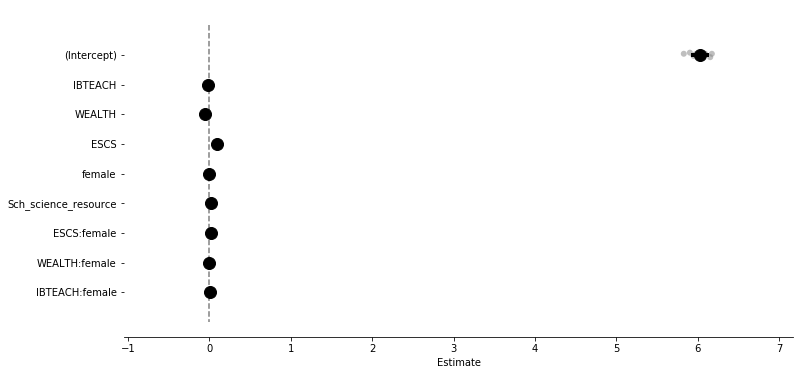

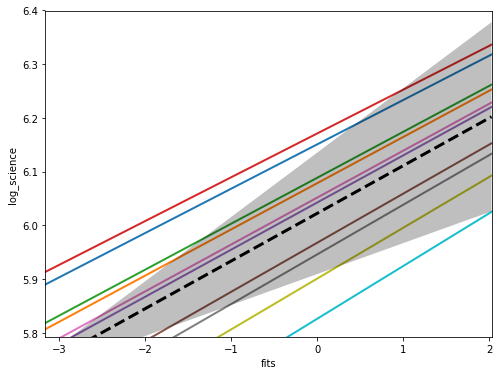

In [52]:
import pandas as pd
import hlm_pymer4 as hpm
df = pd.read_csv('data/sample data.csv').groupby(['CountryID', 'SchoolID']).apply(
    lambda x: x.sample(frac=0.02, random_state=999)).reset_index(drop=True)
model_5_sci = hpm.mixeff_multinteraction2level_model(df)
model_sum_visual(model_5_sci, 'WEALTH', 'log_science')

## Now, let's look at how users can interact with our formula generator andn fun customized models on their own:

We will first import data. For illustration, here we sub-sample a small dataset.

In [53]:
import pandas as pd
import seaborn as sns
from pymer4.models import Lmer
df = pd.read_csv('data/sample data.csv').groupby(['CountryID', 'SchoolID']).apply(
    lambda x: x.sample(frac=0.02, random_state=999)).reset_index(drop=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,CountryID,SchoolID,StudentID,Gender,CountryName,CountryCode,Continent,...,Science,IBTEACH,WEALTH,ESCS,School_type,Sch_science_resource,log_science,female,z_sch_resource,z_IBTEACH
0,12461,34745,34745,56,5650027,5651417,Male,Belgium - Rest of the country,BEL,EU,...,586.4260,-1.0435,-0.0739,1.0494,-1.0,5.0,6.374046,-1,0.119012,-1.099643
1,13154,36507,36507,56,5650078,5652526,Female,Belgium - Rest of the country,BEL,EU,...,684.0211,-0.1798,-0.6315,-0.2282,-1.0,6.0,6.527989,1,0.569286,-0.246594
2,59526,196764,196764,352,35200004,35203363,Male,Iceland,ISL,EU,...,474.4032,-0.0748,-0.5411,1.1494,1.0,4.0,6.162058,-1,-0.331262,-0.142889
3,59801,197384,197384,352,35200034,35202216,Female,Iceland,ISL,EU,...,593.7425,0.2049,0.2106,1.6585,1.0,5.0,6.386446,1,0.119012,0.133362
4,59898,197619,197619,352,35200042,35203996,Male,Iceland,ISL,EU,...,448.1137,0.6256,0.3800,1.1325,1.0,5.0,6.105047,-1,0.119012,0.548873


Then, we will create multi-level formula by importing `formula_creator` tool. Here's an example of selecting students' reading scores this time as an outcome variable, and specify interactions, fixed, and random effects.

In [54]:
import formula_creator as mod
mod.main()

Input outcome value:Reading

Input level values one by one, "s" to stop:
SchoolID
CountryID
s

Interaction? (y/n)y
Input interaction:
Input first var:WEALTH
Input second var:female
Stop inputing? (y/n)y

Fixed effect? (y/n)WEALTH

Random effect? (y/n)female

Want to input grand mean intercept? (y/n)n
Lmer('Reading ~ WEALTH*female + (1|SchoolID/CountryID)')
Random effect, 2-level, interation model


## Lmer('Reading ~ WEALTH*female + (1|SchoolID/CountryID)')

Now, we have created the formula as below. The users will need to copy-paste the formula and specify data in their own model. They would need to add `.fit(REML=False)` for the model to give estimation.

In [55]:
trial = Lmer('Reading ~ WEALTH*female + (1|SchoolID/CountryID)', data = df)
trial.fit(REML=False)

/home/rohit000/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Formula: Reading ~ WEALTH*female + (1|SchoolID/CountryID)

Family: gaussian	 Inference: parametric

Number of observations: 273	 Groups: {'CountryID:SchoolID': 224.0, 'SchoolID': 224.0}

Log-likelihood: -1637.889 	 AIC: 3289.778

Random effects:

                           Name       Var     Std
CountryID:SchoolID  (Intercept)  2523.959  50.239
SchoolID            (Intercept)  1223.756  34.982
Residual                         6060.556  77.850

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),458.577,445.969,471.184,6.433,213.850,71.290,0.000,***
WEALTH,-8.492,-17.452,0.469,4.572,271.639,-1.857,0.064,.
female,11.073,-0.656,22.801,5.984,264.300,1.850,0.065,.
WEALTH:female,-3.691,-12.586,5.204,4.538,267.432,-0.813,0.417,


### We can check up specific list of coeffients.

In [56]:
trial.coefs

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),458.576618,445.969024,471.184212,6.432564,213.849570,71.289865,5.109954e-151,***
WEALTH,-8.491573,-17.451781,0.468635,4.571619,271.638877,-1.857454,6.432868e-02,.
female,11.072804,-0.655574,22.801181,5.983976,264.300271,1.850409,6.537051e-02,.
WEALTH:female,-3.690702,-12.585737,5.204334,4.538367,267.431874,-0.813222,4.168139e-01,


In [58]:
trial.ranef_var

,Name,Var,Std
CountryID:SchoolID,(Intercept),2523.958941,50.239018
SchoolID,(Intercept),1223.755513,34.982217
Residual,,6060.556264,77.849575


In [59]:
trial.fixef

[     (Intercept)    WEALTH     female  WEALTH:female
 0     490.833792 -8.491573  11.072804      -3.690702
 1     504.427429 -8.491573  11.072804      -3.690702
 2     453.878945 -8.491573  11.072804      -3.690702
 3     507.802614 -8.491573  11.072804      -3.690702
 4     476.191146 -8.491573  11.072804      -3.690702
 5     438.527215 -8.491573  11.072804      -3.690702
 6     478.729786 -8.491573  11.072804      -3.690702
 7     483.912414 -8.491573  11.072804      -3.690702
 8     407.875018 -8.491573  11.072804      -3.690702
 9     454.968589 -8.491573  11.072804      -3.690702
 10    496.226753 -8.491573  11.072804      -3.690702
 11    486.119793 -8.491573  11.072804      -3.690702
 12    430.715097 -8.491573  11.072804      -3.690702
 13    490.924392 -8.491573  11.072804      -3.690702
 14    448.898633 -8.491573  11.072804      -3.690702
 15    475.956719 -8.491573  11.072804      -3.690702
 16    476.100709 -8.491573  11.072804      -3.690702
 17    451.427922 -8.491573 

### Here's a way to see model summary visualization.

Multiple random effects clusters specified in model. Plotting the 1 one. This can be changed by passing 'ranef_idx = number'


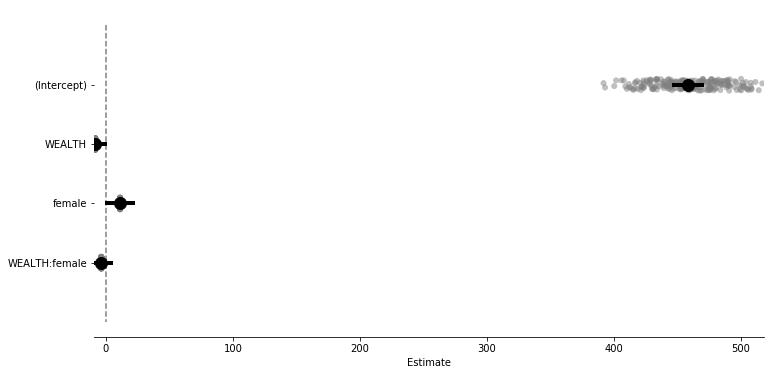

In [60]:
trial.plot_summary()